In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n = 100

data = pd.DataFrame({
    "Age": np.random.randint(25, 70, n),
    "Gender": np.random.choice(["Male", "Female"], n),
    "Evaluation_Score": np.round(np.random.normal(4, 0.5, n), 2),
    "Tenure": np.random.choice(["Tenured", "Untenured"], n, p=[0.6, 0.4]),
    "Visible_Minority": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7])
})

data["Evaluation_Score"] = data["Evaluation_Score"].clip(1, 5)

print("Synthetic dataset preview:\n", data.head())


Synthetic dataset preview:
    Age  Gender  Evaluation_Score     Tenure Visible_Minority
0   63  Female              3.33    Tenured              Yes
1   53    Male              3.49  Untenured               No
2   39    Male              4.06    Tenured               No
3   67    Male              3.38    Tenured               No
4   32    Male              4.97  Untenured               No


1. Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority? [5]

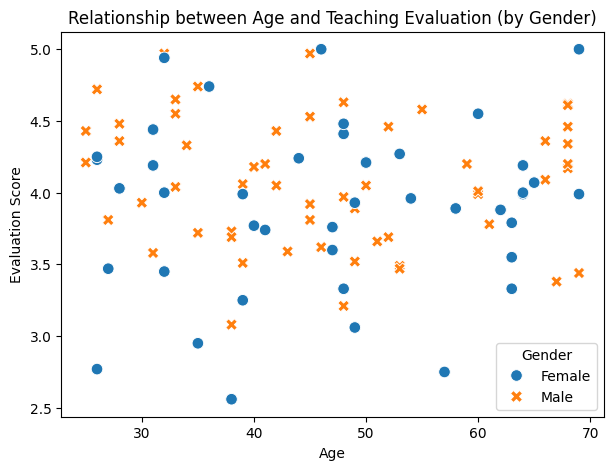

Percentage of visible minorities who are tenured: 66.67%

Tenure status by visible minority (%):
 Tenure              Tenured  Untenured
Visible_Minority                      
No                69.736842  30.263158
Yes               66.666667  33.333333


In [3]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="Age", y="Evaluation_Score", hue="Gender", style="Gender", s=70)
plt.title("Relationship between Age and Teaching Evaluation (by Gender)")
plt.xlabel("Age")
plt.ylabel("Evaluation Score")
plt.show()

minority_tenured = data[(data["Visible_Minority"]=="Yes") & (data["Tenure"]=="Tenured")]
visible_minority_total = data[data["Visible_Minority"]=="Yes"]
percent_tenured_visible = (len(minority_tenured) / len(visible_minority_total)) * 100

print(f"Percentage of visible minorities who are tenured: {percent_tenured_visible:.2f}%")

tenure_counts = pd.crosstab(data["Visible_Minority"], data["Tenure"], normalize='index') * 100
print("\nTenure status by visible minority (%):\n", tenure_counts)

2. Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors. [4

In [4]:
age_stats = data.groupby("Tenure")["Age"].agg(["mean", "std"]).round(2)
print("\nMean and SD of Age by Tenure:\n", age_stats)


Mean and SD of Age by Tenure:
             mean    std
Tenure                 
Tenured    45.90  12.26
Untenured  48.16  15.50


3. Which graph works better and plot that graph for the age variable? [5]

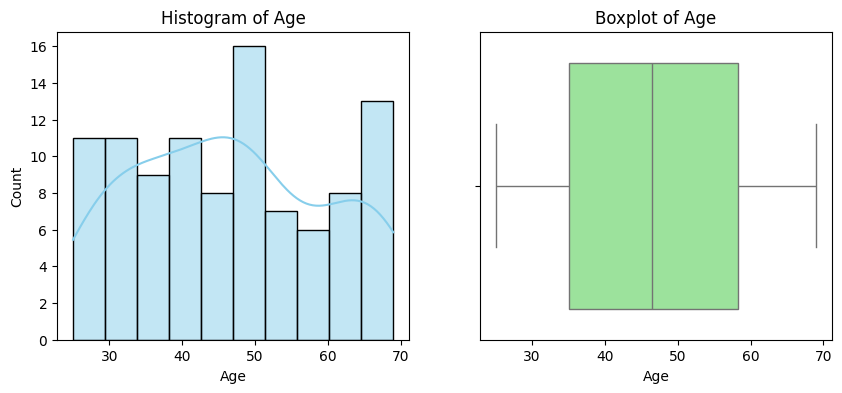

Boxplot works better for comparing distributions and detecting outliers visually.


In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data["Age"], bins=10, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title("Histogram of Age")
sns.boxplot(x=data["Age"], ax=ax[1], color='lightgreen')
ax[1].set_title("Boxplot of Age")
plt.show()

print("Boxplot works better for comparing distributions and detecting outliers visually.")

4. Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable. [4]


Difference between pyplot.bar and pyplot.barh:
- plt.bar() creates a vertical bar chart (bars go up/down along the y-axis).
- plt.barh() creates a horizontal bar chart (bars extend left/right along the x-axis).



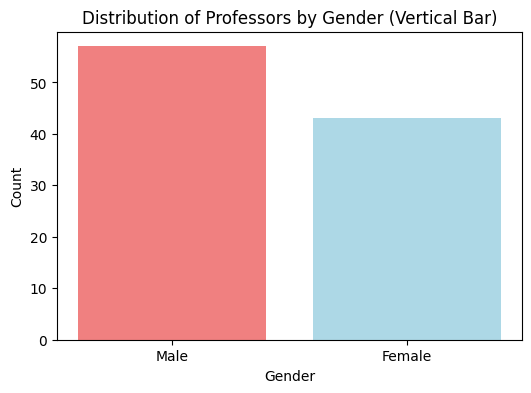

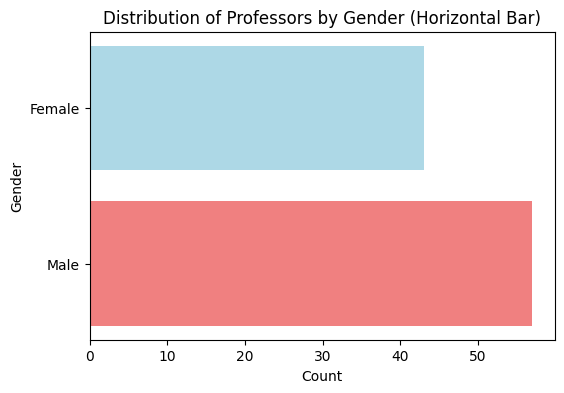

In [6]:
print("""
Difference between pyplot.bar and pyplot.barh:
- plt.bar() creates a vertical bar chart (bars go up/down along the y-axis).
- plt.barh() creates a horizontal bar chart (bars extend left/right along the x-axis).
""")

# Plot bar chart for Gender variable
gender_counts = data["Gender"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['lightcoral','lightblue'])
plt.title("Distribution of Professors by Gender (Vertical Bar)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Horizontal version
plt.figure(figsize=(6,4))
plt.barh(gender_counts.index, gender_counts.values, color=['lightcoral','lightblue'])
plt.title("Distribution of Professors by Gender (Horizontal Bar)")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

5. What is the Median evaluation score for tenured Professors? [2]

In [7]:
median_eval_tenured = data[data["Tenure"]=="Tenured"]["Evaluation_Score"].median()
print(f"\nMedian Evaluation Score for Tenured Professors: {median_eval_tenured:.2f}")


Median Evaluation Score for Tenured Professors: 3.99
